# SERPRO - Weather

_Previsão de temperaturas médias com base em dados históricos_

https://www.kaggle.com/c/serpro-weather/

## Referências

### Prophet Quick Start Guide 
- https://facebook.github.io/prophet/docs/quick_start.html

### GitHub - facebook/prophet
- https://github.com/facebook/prophet

### Analysis of Stock Market Cycles with fbprophet package in Python
- https://towardsdatascience.com/analysis-of-stock-market-cycles-with-fbprophet-package-in-python-7c36db32ecd0

## Importação dos pacotes

In [2]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Carga dos dados

In [4]:
prefixo_arquivos = ''
#prefixo_arquivos = 'https://github.com/hjort/ai-labs/raw/master/kaggle/serpro-weather/'

In [5]:
# carregar arquivo de dados de treino
train_data = pd.read_csv(prefixo_arquivos + 'weather-train.csv', index_col='date', parse_dates=['date'])
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2012-10-01 to 2016-11-16
Data columns (total 1 columns):
temperature    1507 non-null float64
dtypes: float64(1)
memory usage: 23.6 KB


,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


In [9]:
# carregar arquivo de dados de teste
test_data = pd.read_csv(prefixo_arquivos + 'weather-test.csv', index_col='date', parse_dates=['date'])
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 2016-11-17 to 2017-11-29
Empty DataFrame

""
date
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21


## Transformações nos dados

In [10]:
# ajustar dados de treino para o formato do Prophet
data2 = train_data[['temperature']]
data2 = data2.reset_index()
data2.columns = ['ds', 'y']
data2.head()

,ds,y
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431


In [11]:
data2.tail()

,ds,y
1503,2016-11-12,8.532580
1504,2016-11-13,11.768994
1505,2016-11-14,11.840963
1506,2016-11-15,13.187376
1507,2016-11-16,16.712678


## Modelagem preditiva

### Teste do modelo

In [12]:
# criar e treinar o modelo
model = Prophet(daily_seasonality=False)
model.fit(data2)

In [16]:
# criar série com dados futuros (2 anos)
future = model.make_future_dataframe(periods=365*2)
future.tail()

,ds
2233,2018-11-12
2234,2018-11-13
2235,2018-11-14
2236,2018-11-15
2237,2018-11-16


In [17]:
# realizar previsão com dados futuros
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2233,2018-11-12,23.287162,17.379829,29.485228
2234,2018-11-13,23.057445,17.210794,29.197567
2235,2018-11-14,22.443933,16.414306,28.273252
2236,2018-11-15,22.124222,16.117469,27.688164
2237,2018-11-16,21.960465,15.693564,27.810943


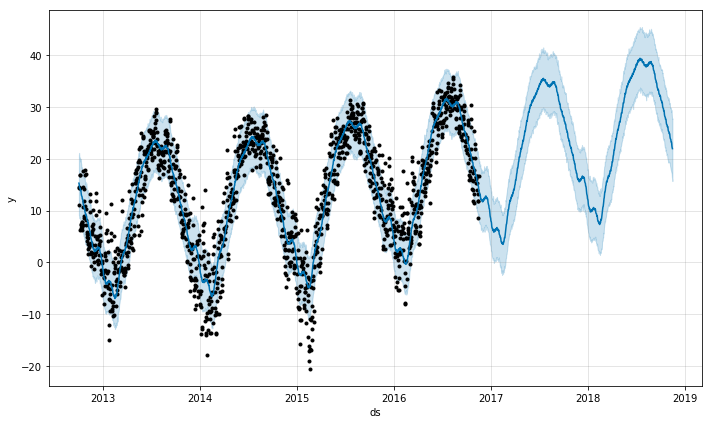

In [18]:
# plotar dados reais e previsão
fig1 = model.plot(forecast)

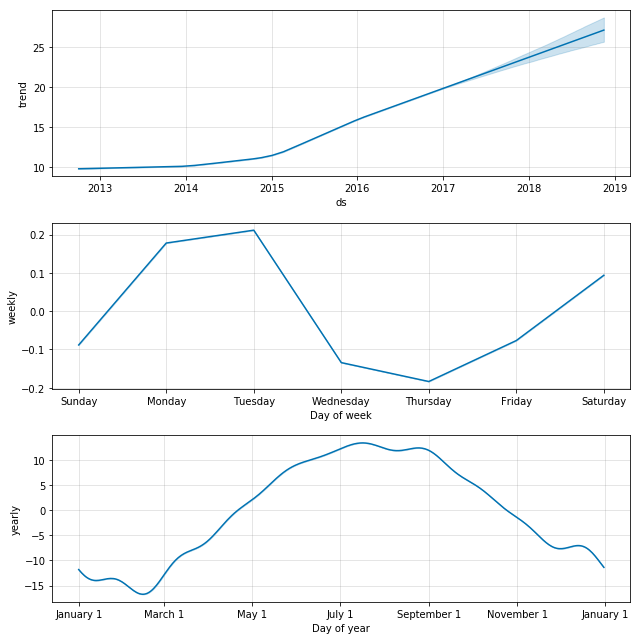

In [19]:
# decompor tendência e sazonalidades do modelo
fig2 = model.plot_components(forecast)

### Avaliar a precisão do modelo

In [40]:
# dividir os dados em 80% + 20%
divisao = int(data2.shape[0] * 4 / 5)
data2a = data2[:divisao]
data2b = data2[divisao:]
print(data2.shape, '=', data2a.shape, '+', data2b.shape)

(1508, 2) = (1206, 2) + (302, 2)


In [41]:
data2a.info()
data2a.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 2 columns):
ds    1206 non-null datetime64[ns]
y     1205 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.9 KB


,ds,y
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431


In [42]:
# criar e treinar o modelo
model = Prophet(daily_seasonality=False)
model.fit(data2a)

In [43]:
# preparar dados futuros
future = data2b.drop(['y'], axis=1)
future.info()
future.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 1206 to 1507
Data columns (total 1 columns):
ds    302 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.4 KB


,ds
1206,2016-01-20
1207,2016-01-21
1208,2016-01-22
1209,2016-01-23
1210,2016-01-24


In [44]:
# realizar a previsão
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail()

,ds,yhat
297,2016-11-12,18.053579
298,2016-11-13,17.591512
299,2016-11-14,17.464488
300,2016-11-15,17.128377
301,2016-11-16,16.342425


In [50]:
# mesclar os dois dataframes novamente
data3 = data2b.merge(forecast)[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]
data3['diff'] = abs(data3['y'] - data3['yhat'])
data3.info()
data3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 301
Data columns (total 6 columns):
ds            302 non-null datetime64[ns]
y             302 non-null float64
yhat          302 non-null float64
yhat_lower    302 non-null float64
yhat_upper    302 non-null float64
diff          302 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 16.5 KB


,ds,y,yhat,yhat_lower,yhat_upper,diff
0,2016-01-20,-2.969248,2.560867,-3.258898,7.786915,5.530114
1,2016-01-21,-0.811279,2.553138,-3.451298,7.735094,3.364417
2,2016-01-22,1.663535,2.804298,-3.413033,8.363543,1.140763
3,2016-01-23,1.911159,3.050557,-2.712524,9.257120,1.139398
4,2016-01-24,1.528472,2.804089,-2.686863,8.385062,1.275616


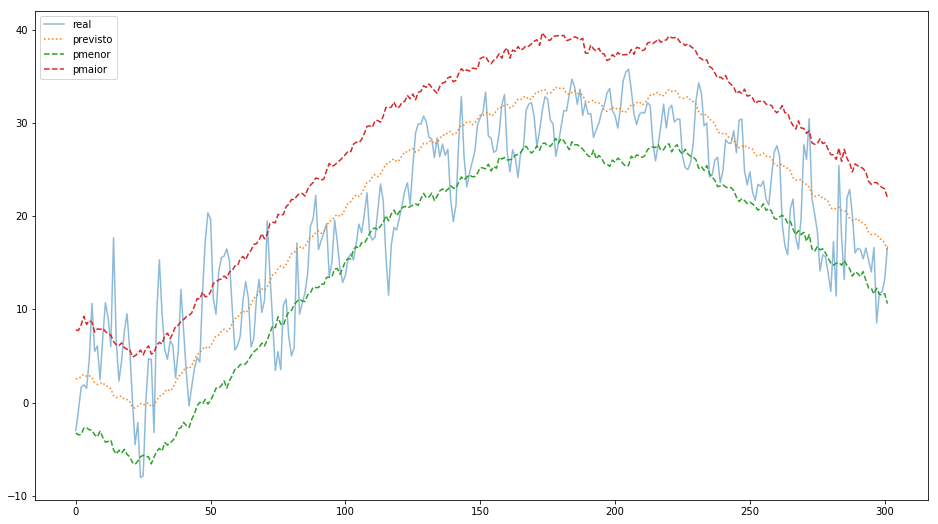

In [51]:
# plotar gráfico comparando valores reais e previstos
plt.figure(figsize=(16, 9))

data3['y'].plot(alpha=0.5, style='-')
data3['yhat'].plot(style=':')
data3['yhat_lower'].plot(style='--')
data3['yhat_upper'].plot(style='--')

plt.legend(['real', 'previsto', 'pmenor', 'pmaior'], loc='upper left')

### Medição do Erro Médio Quadrático (RMSE)

In [52]:
def rmse(predictions, targets):
    assert len(predictions) == len(targets)
    return np.sqrt(np.mean((predictions - targets) ** 2))

def rmsle(predictions, targets):
    assert len(predictions) == len(targets)
    return np.sqrt(np.mean((np.log(1 + predictions) - np.log(1 + targets)) ** 2))

In [53]:
print('RMSE:', rmse(data3['yhat'], data3['y']))

RMSE: 4.978555350200282


## Previsão de valores futuros com os dados de teste

In [28]:
# criar dados futuros a partir dos dados de teste
future_data = pd.DataFrame(test_data.index.values, columns=['ds'])
future_data.info()
future_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 1 columns):
ds    378 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


,ds
0,2016-11-17
1,2016-11-18
2,2016-11-19
3,2016-11-20
4,2016-11-21


In [29]:
# realizar a previsão
forecast = model.predict(future_data)
forecast[['ds', 'yhat']].tail()

,ds,yhat
373,2017-11-25,16.198291
374,2017-11-26,15.890747
375,2017-11-27,16.056617
376,2017-11-28,16.015803
377,2017-11-29,15.621383


In [31]:
# construir dataframe com previsão
pred_data = pd.DataFrame({
    'date': forecast['ds'],
    'temperature': forecast['yhat']
})
pred_data.set_index('date', inplace=True)
pred_data.info()
pred_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 378 entries, 2016-11-17 to 2017-11-29
Data columns (total 1 columns):
temperature    378 non-null float64
dtypes: float64(1)
memory usage: 5.9 KB


,temperature
date,
2016-11-17,13.695237
2016-11-18,13.541633
2016-11-19,13.460392
2016-11-20,13.038404
2016-11-21,13.078933


## Geração do arquivo de resultados

In [32]:
# criar diretório de submissões
!dd="submissions/"; if [ ! -d $dd ]; then mkdir $dd; fi

In [33]:
# gravar arquivo CSV com os resultados
nome_arquivo = 'submissions/weather-submission-prophet.csv'
pred_data.to_csv(nome_arquivo)
print('Arquivo gravado com sucesso:', nome_arquivo)

Arquivo gravado com sucesso: submissions/weather-submission-prophet.csv


## Comparação da previsão com dados reais

In [54]:
# carregar dados reais
real_data = pd.read_csv(prefixo_arquivos + 'weather-solution.csv', index_col='date', parse_dates=['date'])
real_data.head()

,temperature
date,
2016-11-17,13.760203
2016-11-18,21.451060
2016-11-19,13.059696
2016-11-20,8.178332
2016-11-21,6.044745


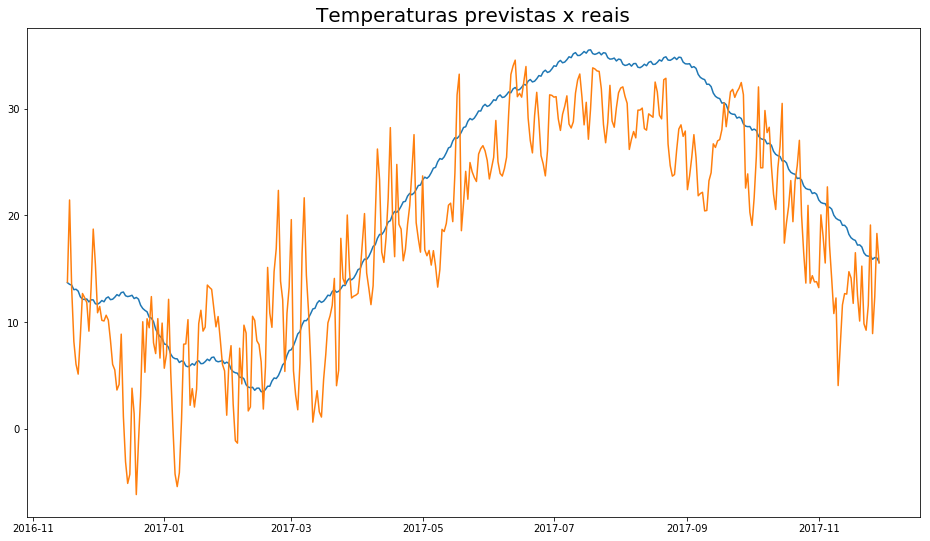

In [58]:
# comparação com os dados reais
plt.figure(figsize=(16, 9))
plt.plot(pred_data)
plt.plot(real_data)
plt.title('Temperaturas previstas x reais', fontsize=20)
plt.show()